<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/ML_predi%C3%A7ao_dolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Modelo de ML para Prediçao do dolar
neste modelo analizamos os valores historicos do dolar junto con as reservas internacionales(en Billones de reales) diariamente para asi tener una prediccion mas "esperada"

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
dataset= pd.read_excel('/content/BaseDeDatosLista.xlsx')

In [3]:
dataset.head()

,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%,DATA,RESERVAS
0,2024-04-30,5.1934,5.1190,5.1975,5.1133,95.19,0.0146,2024-04-30,351.599
1,2024-04-29,5.1189,5.1170,5.1227,5.1020,95.19,0.0007,2024-04-29,351.599
2,2024-04-26,5.1151,5.1615,5.1673,5.1085,95.19,-0.0087,2024-04-26,351.599
3,2024-04-25,5.1602,5.1472,5.1935,5.1099,95.19,0.0028,2024-04-25,351.599
4,2024-04-24,5.1457,5.1263,5.1720,5.1238,95.19,0.0038,2024-04-24,351.599


en la parte de vol/ mas del 50% estava vazio, entonces(en excel) sacamos la media del numero total que teniamos disponible y rellenamos lo restante que faltaba

In [4]:
dataset.describe()

,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%,DATA,RESERVAS
count,863,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863,863.000000
mean,2022-08-29 14:57:42.340672256,5.166555,5.167387,5.204434,5.130879,110.535458,0.000046,2022-08-29 14:57:42.340672256,348.206312
min,2021-01-01 00:00:00,4.592800,4.595000,4.622500,4.580500,0.010000,-0.045800,2021-01-01 00:00:00,324.703000
25%,2021-10-30 12:00:00,4.966900,4.967550,4.992700,4.940250,95.190000,-0.006100,2021-10-30 12:00:00,341.158000
50%,2022-08-29 00:00:00,5.159900,5.160500,5.196200,5.121000,95.190000,0.000000,2022-08-29 00:00:00,347.413000
75%,2023-06-28 12:00:00,5.325100,5.325650,5.372000,5.278500,128.585000,0.005400,2023-06-28 12:00:00,355.066000
max,2024-04-30 00:00:00,5.875500,5.875300,5.878700,5.767500,244.220000,0.037100,2024-04-30 00:00:00,370.395000
std,NaN,0.251881,0.252056,0.256388,0.245411,34.828926,0.009619,NaN,11.548057


In [5]:
dataset.info()
#la mayor parte de tratamiento de los datos fue echa en excel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      863 non-null    datetime64[ns]
 1   Último    863 non-null    float64       
 2   Abertura  863 non-null    float64       
 3   Máxima    863 non-null    float64       
 4   Mínima    863 non-null    float64       
 5   Vol/      863 non-null    float64       
 6   Var%      863 non-null    float64       
 7   DATA      863 non-null    datetime64[ns]
 8   RESERVAS  863 non-null    float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 60.8 KB


In [6]:
dataset = dataset.drop(dataset.columns[7], axis=1)
#eliminamos uma columna nao desejada

In [7]:
dataset.head()

,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%,RESERVAS
0,2024-04-30,5.1934,5.1190,5.1975,5.1133,95.19,0.0146,351.599
1,2024-04-29,5.1189,5.1170,5.1227,5.1020,95.19,0.0007,351.599
2,2024-04-26,5.1151,5.1615,5.1673,5.1085,95.19,-0.0087,351.599
3,2024-04-25,5.1602,5.1472,5.1935,5.1099,95.19,0.0028,351.599
4,2024-04-24,5.1457,5.1263,5.1720,5.1238,95.19,0.0038,351.599


In [8]:
dataset["Mean"] = (dataset["Mínima"] + dataset["Máxima"])/2
dataset.head(2)

,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%,RESERVAS,Mean
0,2024-04-30,5.1934,5.119,5.1975,5.1133,95.19,0.0146,351.599,5.15540
1,2024-04-29,5.1189,5.117,5.1227,5.1020,95.19,0.0007,351.599,5.11235


In [9]:
#A função step irá fazer cada valor da média ser introduzido uma linha acima na nova coluna chamada "Actual"

steps=-1
dataset_for_prediction= dataset.copy()
dataset_for_prediction["Actual"]=dataset_for_prediction["Mean"].shift(steps)
dataset_for_prediction.head(3)

,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%,RESERVAS,Mean,Actual
0,2024-04-30,5.1934,5.1190,5.1975,5.1133,95.19,0.0146,351.599,5.15540,5.11235
1,2024-04-29,5.1189,5.1170,5.1227,5.1020,95.19,0.0007,351.599,5.11235,5.13790
2,2024-04-26,5.1151,5.1615,5.1673,5.1085,95.19,-0.0087,351.599,5.13790,5.15170


Exclui os nulos

In [10]:
dataset_for_prediction=dataset_for_prediction.dropna()

In [11]:
dataset_for_prediction["Data"] =pd.to_datetime(dataset_for_prediction["Data"])
dataset_for_prediction.index= dataset_for_prediction["Data"]

Plotando a média do valor do dolar

Text(0.5, 1.0, 'Tyson Opening Stock Value')

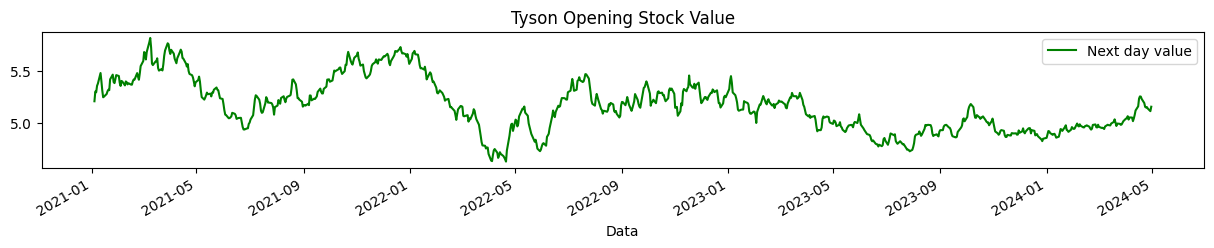

In [12]:
dataset_for_prediction["Mean"].plot(color="green", figsize=(15,2))
plt.legend(["Next day value", "Mean"])
plt.title("Tyson Opening Stock Value")

Volume de dolares vendidos

Text(0.5, 1.0, 'Dolar Volume')

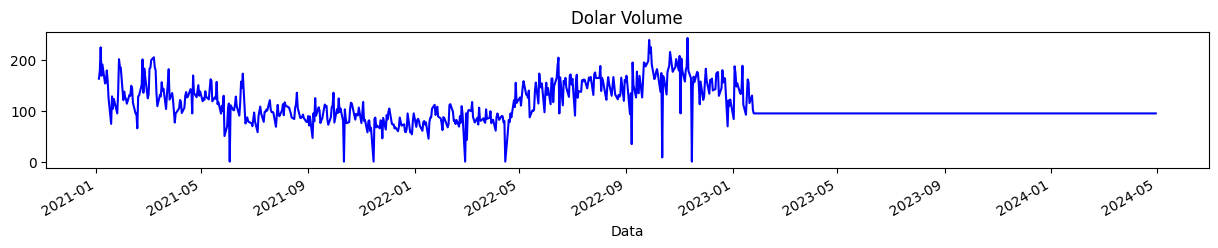

In [13]:
dataset_for_prediction["Vol/"].plot(color="blue", figsize=(15,2))
plt.title("Dolar Volume")

Aplicando a normalização na base e separando a base em X e Y

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[["Mínima", "Máxima","Abertura", "Último", "RESERVAS","Vol/"	,"Var%","RESERVAS", "Mean"]])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [15]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[["Actual"]])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [16]:
X.rename(columns={0:"Mínima", 1:"Máxima", 2:"Abertura", 3:"Ultimo", 4:"Vol/", 5:"Var%",6:"RESERVAS", 7:"Mean"}, inplace=True)
X.index=dataset_for_prediction.index
X.head(2)

,Mínima,Máxima,Abertura,Ultimo,Vol/,Var%,RESERVAS,Mean,8
Data,,,,,,,,,
2024-04-30,0.448863,0.457730,0.409279,0.468231,0.588637,0.389747,0.728589,0.588637,0.443885
2024-04-29,0.439343,0.398185,0.407717,0.410150,0.588637,0.389747,0.560917,0.588637,0.408029


In [17]:
#cambiamos el nombre de la columna 0(minima) a stock price...
y.rename(columns={0:"Stock Price next day"}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,Stock Price next day
Data,
2024-04-30,0.408029
2024-04-29,0.429309


In [18]:
#Dividir base em treino e teste
train_size=int(len(dataset) *0.7)
test_size = int(len(dataset)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

Entendendo as séries temporais

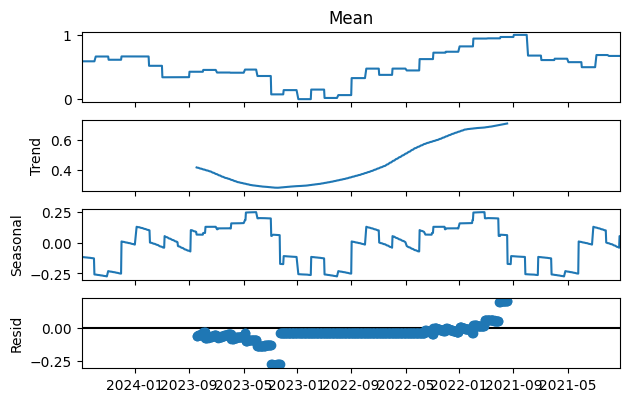

In [19]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X["Mean"],model="add",period=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

Cria uma função para classificar se devemos aceitar o rejeitar a hipótese nula

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Forte evidência contra a hipótese nula")
        print("Rejeite a hipótese nula - Estacionária")
        print("Dados são estacionários", title)
    else:
        print("Forte evidência para a hipótese nula")
        print("Aceite a hipótese nula - Estacionária")
        print("Dados não são estacionários", title)

In [22]:
y_test=y["Stock Price next day"][:train_size].dropna()
test_adf(y_test, " Stock Price")

Forte evidência para a hipótese nula
Aceite a hipótese nula - Estacionária
Dados não são estacionários  Stock Price


In [23]:
test_adf(y_test.diff(), "Stock Price")

Forte evidência contra a hipótese nula
Rejeite a hipótese nula - Estacionária
Dados são estacionários Stock Price


**Autocorrelação**: Coeficiente de correlação entre a o valor atual e seus valores passados. A análise desse gráfico permite entender se a série é aleatória ou possui alguma tendência ou sazonalidade. Com os valores bem próximos a 1, chegamos a conclusão que essa base tem sazonalidade O intervalo de confiança por padrão é 95%, mostrado como essa marca azul. Observações que estão para fora da marca são consideradas estatisticamente correlacionadas.

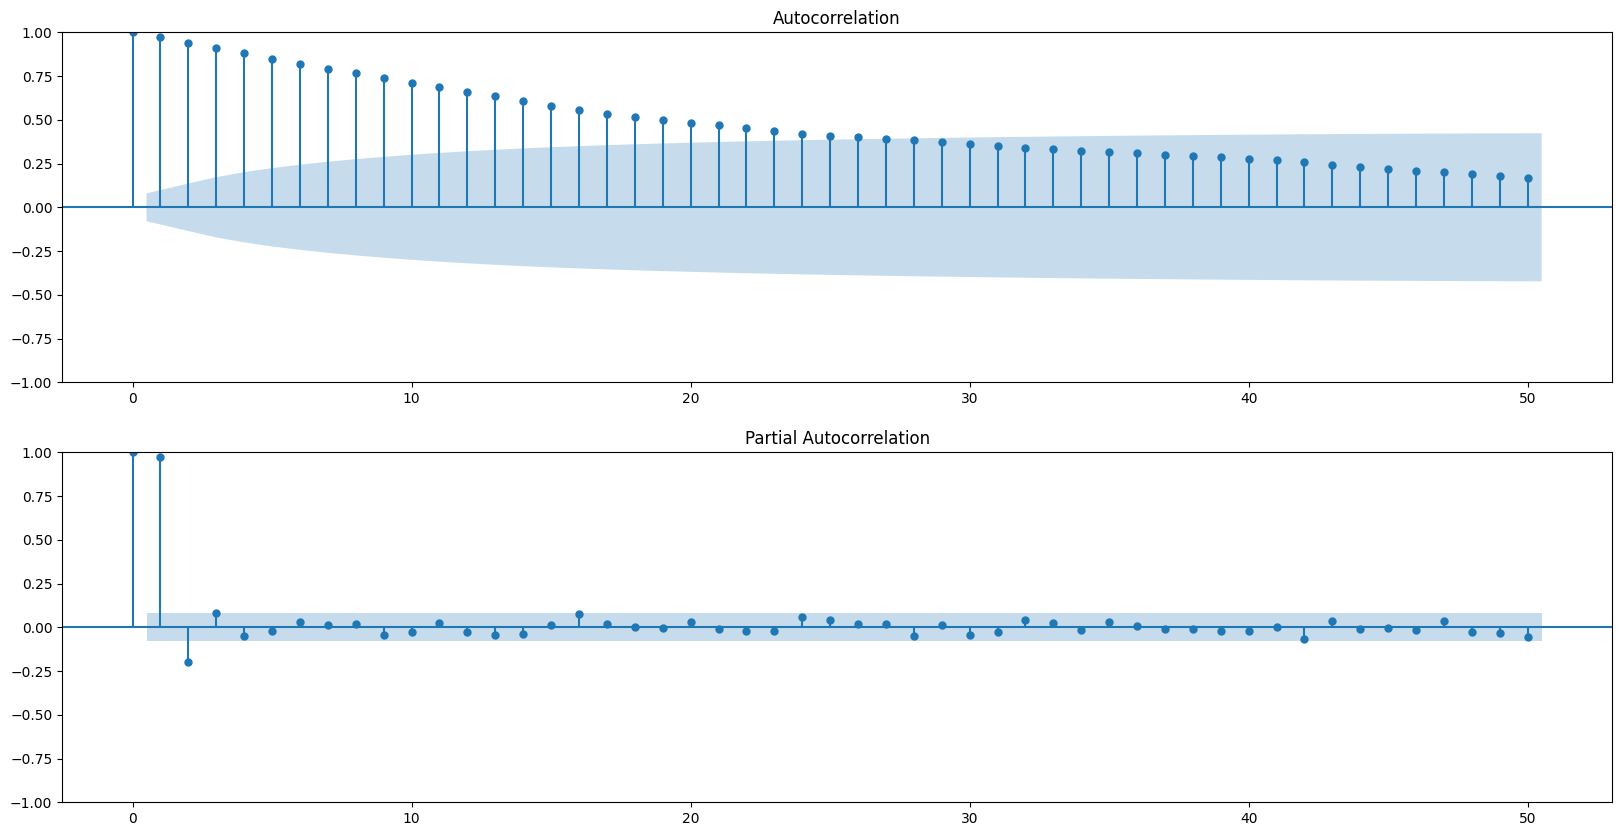

In [24]:
fig,ax= plt.subplots(2,1, figsize=(20,10))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [25]:
!pip install scipy


In [26]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:00


In [27]:
from pmdarima.arima import auto_arima

In [28]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y,
 exogenous= train_X,
 start_p=1, start_q=1,
 max_p=7, max_q=7,
 d=1, max_d=7,
 trace=True,
 error_action="ignore",
 suppress_warnings=True,
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2531.467, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2468.608, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2520.403, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2533.020, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2470.244, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2531.572, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2529.826, Time=2.77 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2534.786, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2533.024, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2533.325, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2522.183, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2531.572, Time=0.62 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.472 seconds


In [29]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  604
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1269.393
Date:                Fri, 31 May 2024   AIC                          -2534.786
Time:                        20:02:55   BIC                          -2525.982
Sample:                             0   HQIC                         -2531.360
                                - 604                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3521      0.034     10.445      0.000       0.286       0.418
sigma2         0.0009   3.78e-05     22.962      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                64.42
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               3.17   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y,
 exog=train_X,
 order=(0,1,1),
 enforce_invertibility=False, enforce_stationarity=False)

In [49]:
results= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

In [51]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

In [52]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [53]:
act.index=test_X.index

In [54]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)

<Axes: xlabel='Data'>

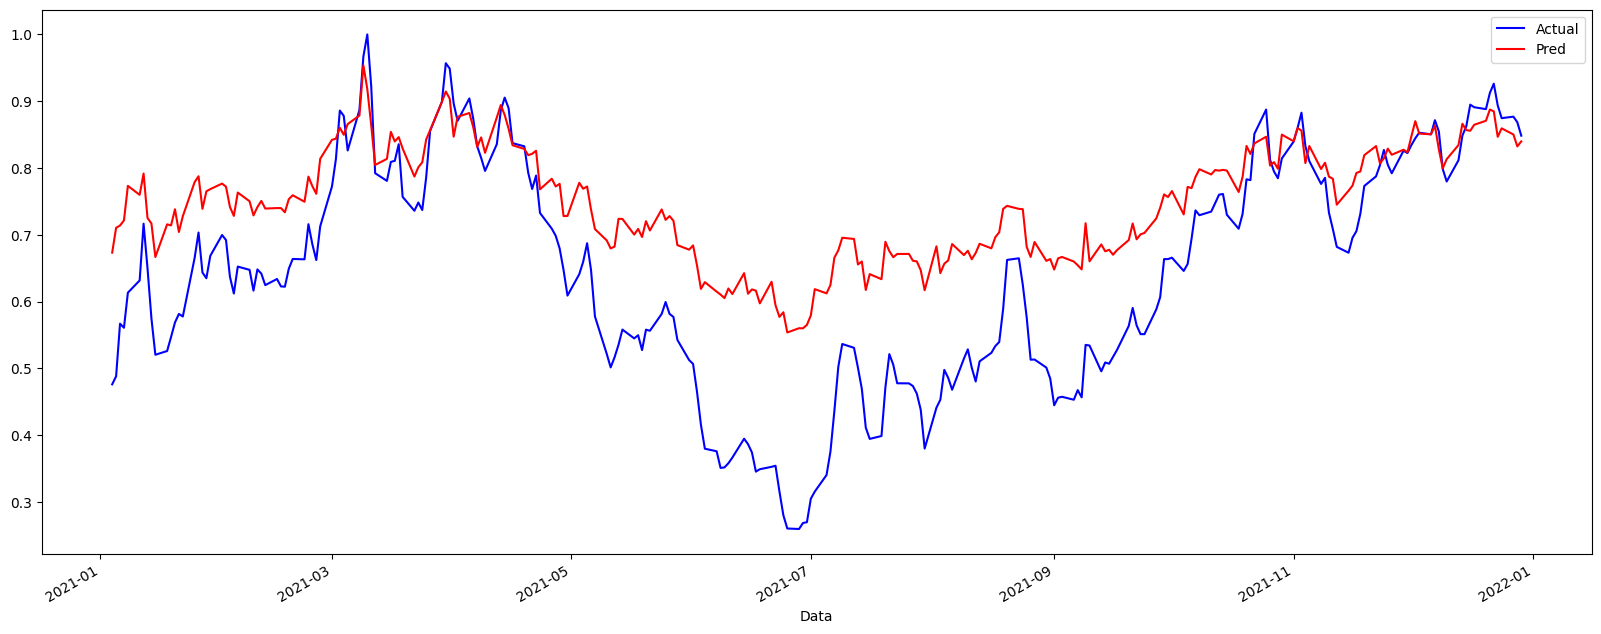

In [55]:
predictions["Actual"].plot(figsize=(20,8), legend=True, color="blue")
predictions["Pred"].plot(legend=True, color="red", figsize=(20,8))

In [39]:
actual= pd.DataFrame(scaler_output.iloc[train_size:, 0])
actual.index=test_X.index
actual.head()

,Stock Price next day
Data,
2021-12-29,0.848415
2021-12-28,0.868446
2021-12-27,0.876900
2021-12-24,0.874651
2021-12-23,0.893808
